In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
song_df=pd.read_csv(r"C:\Users\Satyajit Samal\OneDrive\Desktop\DSMP\Ml_projects\Recomendation_system\data\raw\song_data.csv")

In [100]:
song_df.head()

,Unnamed: 0,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


In [4]:
song_df.shape

(50683, 22)

In [5]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           50683 non-null  int64  
 1   track_id             50683 non-null  object 
 2   name                 50683 non-null  object 
 3   artist               50683 non-null  object 
 4   spotify_preview_url  50683 non-null  object 
 5   spotify_id           50683 non-null  object 
 6   tags                 49556 non-null  object 
 7   genre                22348 non-null  object 
 8   year                 50683 non-null  int64  
 9   duration_ms          50683 non-null  int64  
 10  danceability         50683 non-null  float64
 11  energy               50683 non-null  float64
 12  key                  50683 non-null  int64  
 13  loudness             50683 non-null  float64
 14  mode                 50683 non-null  int64  
 15  speechiness          50683 non-null 

In [6]:
song_df.isnull().sum()

Unnamed: 0                 0
track_id                   0
name                       0
artist                     0
spotify_preview_url        0
spotify_id                 0
tags                    1127
genre                  28335
year                       0
duration_ms                0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
dtype: int64

In [101]:
(song_df.isnull().sum()/song_df.shape[0])*100

Unnamed: 0              0.000000
track_id                0.000000
name                    0.000000
artist                  0.000000
spotify_preview_url     0.000000
spotify_id              0.000000
tags                    2.223625
genre                  55.906320
year                    0.000000
duration_ms             0.000000
danceability            0.000000
energy                  0.000000
key                     0.000000
loudness                0.000000
mode                    0.000000
speechiness             0.000000
acousticness            0.000000
instrumentalness        0.000000
liveness                0.000000
valence                 0.000000
tempo                   0.000000
time_signature          0.000000
dtype: float64

In [102]:
song_df.drop_duplicates(subset=["spotify_id","year","duration_ms"],inplace=True)

In [103]:
song_df.duplicated(subset=["spotify_id","year","duration_ms"]).sum()

np.int64(0)

In [104]:
song_df.head()

,Unnamed: 0,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


#### Rest the index

In [105]:
song_df

,Unnamed: 0,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50678,50678,TRQYCFV128F9322F50,Ryusei Rocket,アンティック-珈琲店-,https://p.scdn.co/mp3-preview/d2668a5a3e0b1fda...,0tt1RdeJX1RyuU4hMEZ19T,NaN,NaN,2008,273440,...,6,-3.062,0,0.1650,0.003120,0.000000,0.1300,0.421,166.956,4
50679,50679,TRHQCSH128F42724B7,Colors Of The Wind,ACIDMAN,https://p.scdn.co/mp3-preview/8e22a7052ef3ecf7...,3wkdfXGf5JYErW4b35zP2h,"rock, alternative_rock, japanese, cover",NaN,2004,275133,...,0,-6.811,1,0.1200,0.000940,0.000049,0.1920,0.450,200.350,4
50680,50680,TRZRODK128F92D68D7,The Revelation,coldrain,https://p.scdn.co/mp3-preview/4b51a813f67e3853...,1gXMORZRGA40PE9rDE9cja,"metal, metalcore, post_hardcore",NaN,2014,254826,...,10,-3.092,0,0.2680,0.000108,0.001410,0.1630,0.282,158.025,4
50681,50681,TRGLMEM128F9322F63,Koi no Dependence,アンティック-珈琲店-,https://p.scdn.co/mp3-preview/5a61e031df174666...,1dxMDGvIYHFYgRvmw1uMHG,NaN,NaN,2008,243293,...,4,-3.914,0,0.0530,0.000715,0.001350,0.0571,0.618,109.923,4


In [17]:
song_df.reset_index(drop=True,inplace=True)

## Remove the columns which are not required

In [106]:
song_df.reset_index(drop=True,inplace=True)

In [107]:
song_df

,Unnamed: 0,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50669,50678,TRQYCFV128F9322F50,Ryusei Rocket,アンティック-珈琲店-,https://p.scdn.co/mp3-preview/d2668a5a3e0b1fda...,0tt1RdeJX1RyuU4hMEZ19T,NaN,NaN,2008,273440,...,6,-3.062,0,0.1650,0.003120,0.000000,0.1300,0.421,166.956,4
50670,50679,TRHQCSH128F42724B7,Colors Of The Wind,ACIDMAN,https://p.scdn.co/mp3-preview/8e22a7052ef3ecf7...,3wkdfXGf5JYErW4b35zP2h,"rock, alternative_rock, japanese, cover",NaN,2004,275133,...,0,-6.811,1,0.1200,0.000940,0.000049,0.1920,0.450,200.350,4
50671,50680,TRZRODK128F92D68D7,The Revelation,coldrain,https://p.scdn.co/mp3-preview/4b51a813f67e3853...,1gXMORZRGA40PE9rDE9cja,"metal, metalcore, post_hardcore",NaN,2014,254826,...,10,-3.092,0,0.2680,0.000108,0.001410,0.1630,0.282,158.025,4
50672,50681,TRGLMEM128F9322F63,Koi no Dependence,アンティック-珈琲店-,https://p.scdn.co/mp3-preview/5a61e031df174666...,1dxMDGvIYHFYgRvmw1uMHG,NaN,NaN,2008,243293,...,4,-3.914,0,0.0530,0.000715,0.001350,0.0571,0.618,109.923,4


In [25]:
song_df.columns

Index(['Unnamed: 0', 'track_id', 'name', 'artist', 'spotify_preview_url',
       'spotify_id', 'tags', 'genre', 'year', 'duration_ms', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [108]:
cols_remove=["track_id","spotify_preview_url","name","spotify_id","Unnamed: 0","genre"]
colab_data=song_df.drop(columns=cols_remove)

In [109]:
colab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50674 entries, 0 to 50673
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            50674 non-null  object 
 1   tags              49548 non-null  object 
 2   year              50674 non-null  int64  
 3   duration_ms       50674 non-null  int64  
 4   danceability      50674 non-null  float64
 5   energy            50674 non-null  float64
 6   key               50674 non-null  int64  
 7   loudness          50674 non-null  float64
 8   mode              50674 non-null  int64  
 9   speechiness       50674 non-null  float64
 10  acousticness      50674 non-null  float64
 11  instrumentalness  50674 non-null  float64
 12  liveness          50674 non-null  float64
 13  valence           50674 non-null  float64
 14  tempo             50674 non-null  float64
 15  time_signature    50674 non-null  int64  
dtypes: float64(9), int64(5), object(2)
memor

In [35]:
colab_data.fillna({"tags":"no_tags"},inplace=True)

In [36]:
colab_data.isnull().sum()

artist              0
tags                0
year                0
duration_ms         0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [37]:
colab_data

,artist,tags,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,The Killers,"rock, alternative, indie, alternative_rock, in...",2004,222200,0.355,0.918,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,Oasis,"rock, alternative, indie, pop, alternative_roc...",2006,258613,0.409,0.892,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,Nirvana,"rock, alternative, alternative_rock, 90s, grunge",1991,218920,0.508,0.826,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,Franz Ferdinand,"rock, alternative, indie, alternative_rock, in...",2004,237026,0.279,0.664,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,Radiohead,"rock, alternative, indie, alternative_rock, in...",2008,238640,0.515,0.430,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50669,アンティック-珈琲店-,no_tags,2008,273440,0.438,0.933,6,-3.062,0,0.1650,0.003120,0.000000,0.1300,0.421,166.956,4
50670,ACIDMAN,"rock, alternative_rock, japanese, cover",2004,275133,0.351,0.693,0,-6.811,1,0.1200,0.000940,0.000049,0.1920,0.450,200.350,4
50671,coldrain,"metal, metalcore, post_hardcore",2014,254826,0.434,0.975,10,-3.092,0,0.2680,0.000108,0.001410,0.1630,0.282,158.025,4
50672,アンティック-珈琲店-,no_tags,2008,243293,0.513,0.902,4,-3.914,0,0.0530,0.000715,0.001350,0.0571,0.618,109.923,4


In [39]:
colab_data["artist"]=colab_data["artist"].str.lower()

In [40]:
colab_data

,artist,tags,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,the killers,"rock, alternative, indie, alternative_rock, in...",2004,222200,0.355,0.918,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,oasis,"rock, alternative, indie, pop, alternative_roc...",2006,258613,0.409,0.892,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,nirvana,"rock, alternative, alternative_rock, 90s, grunge",1991,218920,0.508,0.826,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,franz ferdinand,"rock, alternative, indie, alternative_rock, in...",2004,237026,0.279,0.664,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,radiohead,"rock, alternative, indie, alternative_rock, in...",2008,238640,0.515,0.430,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50669,アンティック-珈琲店-,no_tags,2008,273440,0.438,0.933,6,-3.062,0,0.1650,0.003120,0.000000,0.1300,0.421,166.956,4
50670,acidman,"rock, alternative_rock, japanese, cover",2004,275133,0.351,0.693,0,-6.811,1,0.1200,0.000940,0.000049,0.1920,0.450,200.350,4
50671,coldrain,"metal, metalcore, post_hardcore",2014,254826,0.434,0.975,10,-3.092,0,0.2680,0.000108,0.001410,0.1630,0.282,158.025,4
50672,アンティック-珈琲店-,no_tags,2008,243293,0.513,0.902,4,-3.914,0,0.0530,0.000715,0.001350,0.0571,0.618,109.923,4


In [42]:
colab_data.select_dtypes(include="number").agg(["min","max"])

,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
min,1900,1439,0.000,0.0,0,-60.000,0,0.000,0.000,0.000,0.000,0.000,0.000,0
max,2022,3816373,0.986,1.0,11,3.642,1,0.954,0.996,0.999,0.999,0.993,238.895,5


In [65]:
colab_data1=colab_data.copy()

In [66]:
colab_data1["tags"]=colab_data["tags"].str.lower().str.split(",").str.join(" ")

In [49]:
!pip install category_encoders

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.6 MB 2.8 MB/s eta 0:00:04
   ------- -------------------------------- 1.8/9.6 MB 4.8 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.6 MB 4.4 MB/s eta 0:00:02
   --------------- ------------------------ 3.7/9.6 MB 4.1 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.6 MB 4.1 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.6 MB 4.1 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.6 MB 3.3 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.6 MB 3.0 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.6 MB 2.7 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.6 MB 2.7 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.6 MB 2.4 MB/s eta 0:00:02
   ------------------------ --------------- 5.8/9.6 MB 2.3 MB/s eta 0:00:02
   ----------------

In [50]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from category_encoders import CountEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer


In [51]:
colab_data.head(3)

,artist,tags,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,the killers,"rock, alternative, indie, alternative_rock, in...",2004,222200,0.355,0.918,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,oasis,"rock, alternative, indie, pop, alternative_roc...",2006,258613,0.409,0.892,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,nirvana,"rock, alternative, alternative_rock, 90s, grunge",1991,218920,0.508,0.826,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4


In [56]:
num_columns=colab_data.select_dtypes(include="number").columns

In [59]:
def plot_data(cols):
    for col in cols:
        plt.subplot(1,2,1)
        sns.histplot(colab_data[col],kde=True)
        
        plt.title(col)
        plt.subplot(1,2,2)
        sns.barplot(colab_data)
        
        plt.show()

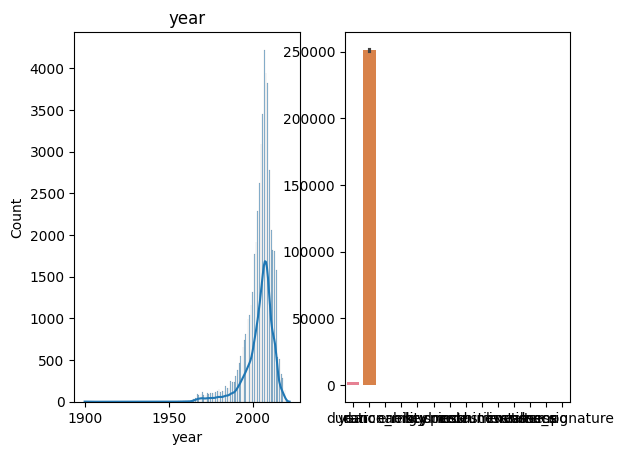

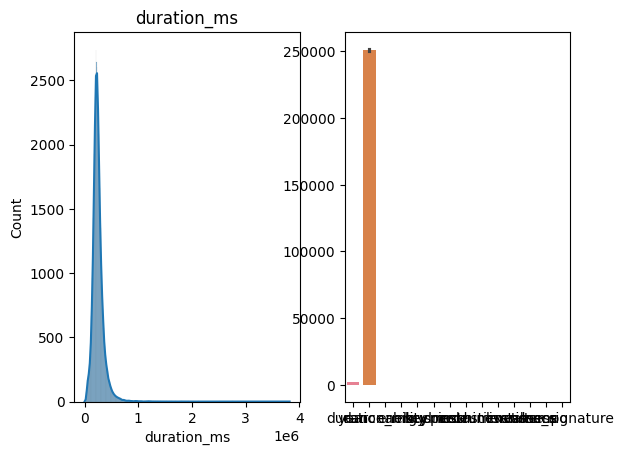

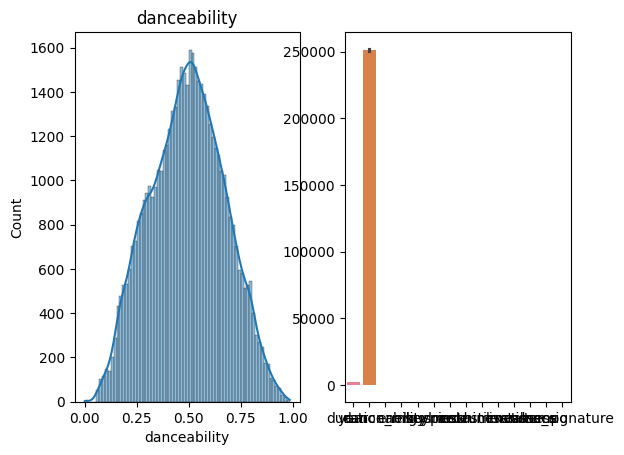

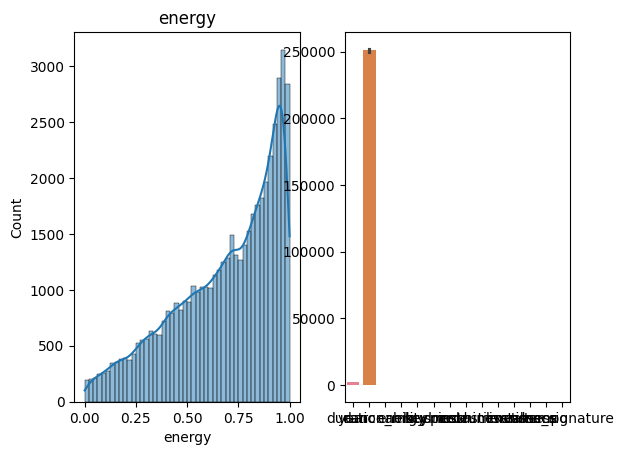

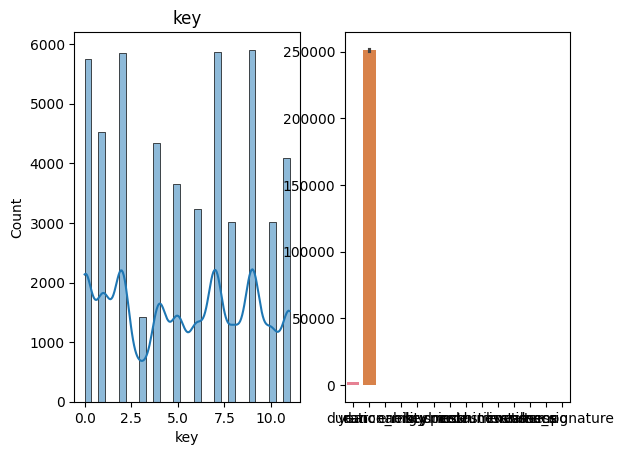

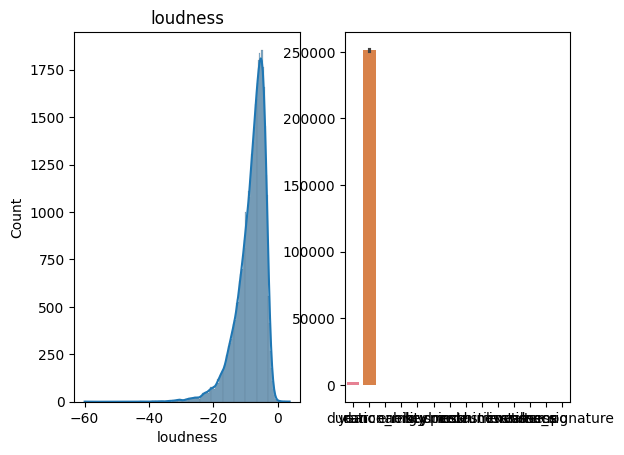

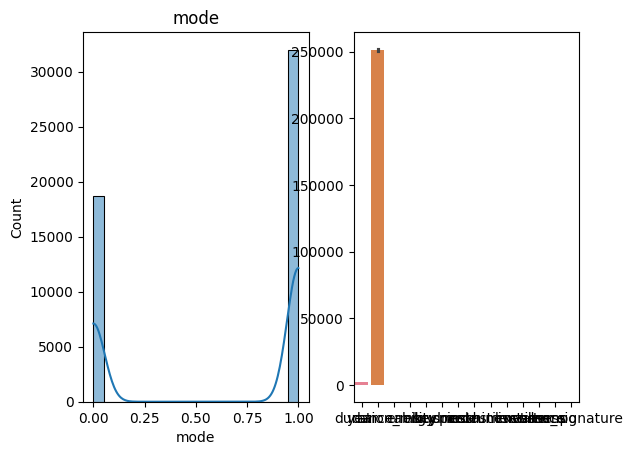

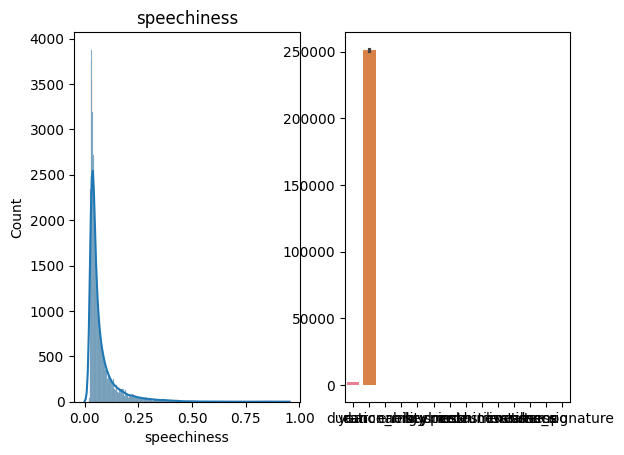

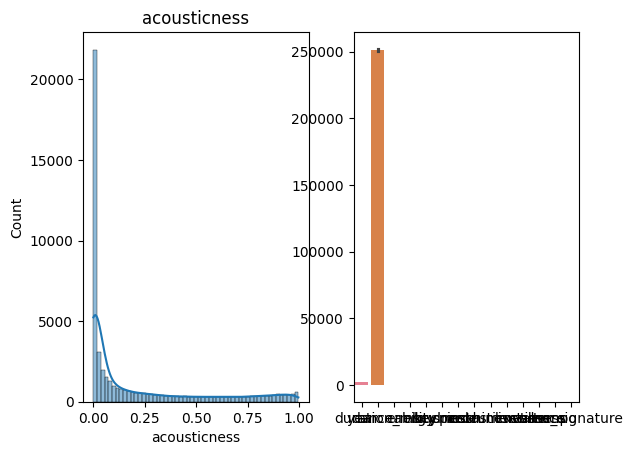

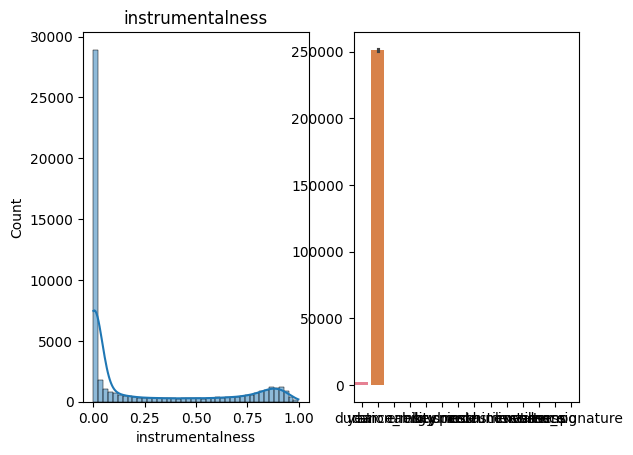

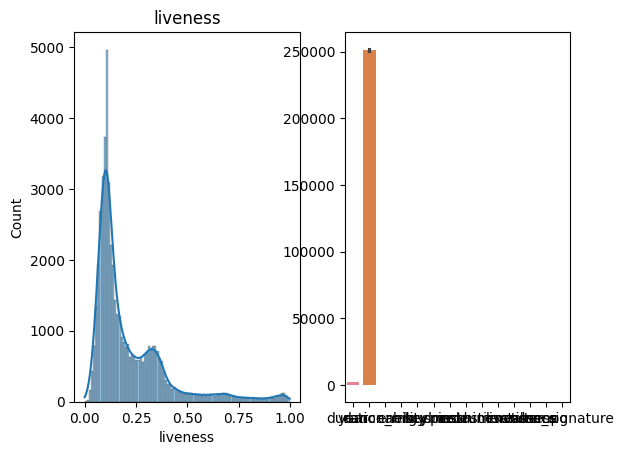

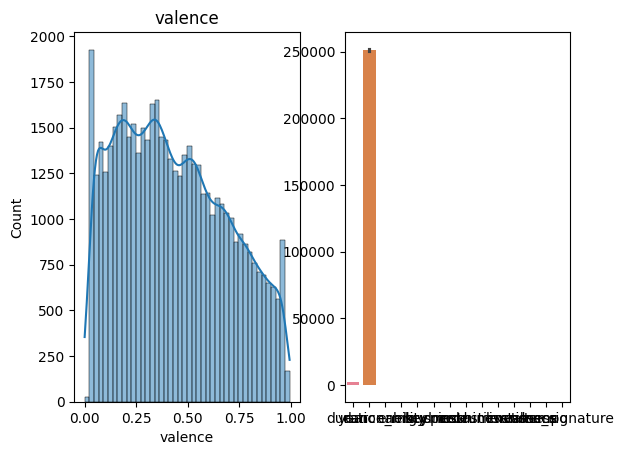

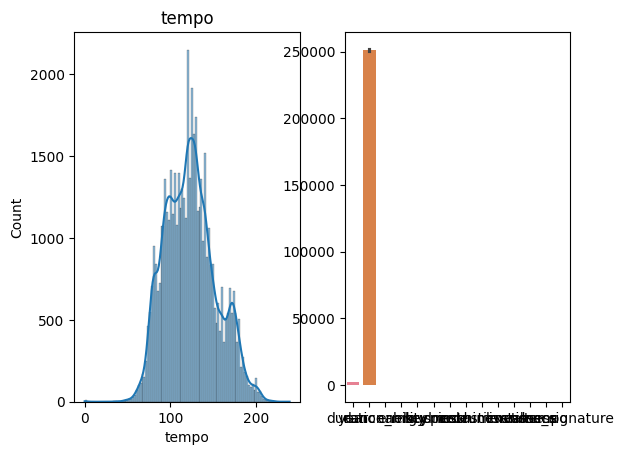

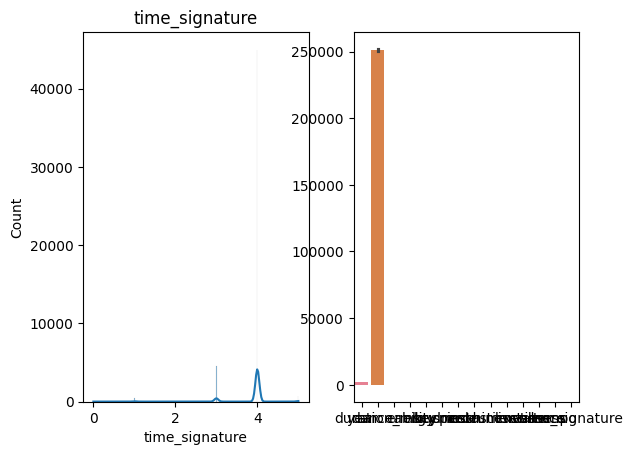

In [60]:
plot_data(num_columns)

In [52]:
colab_data.shape

(50674, 16)

In [82]:
freq_encod_cols=["year"]
ohe_cols=["artist","time_signature","key"]
tfidf_cols="tags"
standard_cols=["duration_ms","loudness","tempo"]
min_max_scale_cols = ["danceability","energy","speechiness","acousticness","instrumentalness","liveness","valence"]




In [83]:
# transform Data
transformer=ColumnTransformer(
    [
        ("freq_encoder",CountEncoder(normalize=True,return_df=True),freq_encod_cols),
        ("Ohe_encoder",OneHotEncoder(handle_unknown="ignore"),ohe_cols),
        ("standardScaler",StandardScaler(),standard_cols),
        ("minmax_scaler",MinMaxScaler(),min_max_scale_cols),
        ("tfidf",TfidfVectorizer(max_features=85),tfidf_cols)
    ],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False
)

In [84]:
transformer

,transformers,"[('freq_encoder', ...), ('Ohe_encoder', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,False
,verbose,0
,cols,None
,drop_invariant,False


In [85]:
transformer.fit(colab_data1)

,transformers,"[('freq_encoder', ...), ('Ohe_encoder', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,False
,verbose,0
,cols,None
,drop_invariant,False


In [86]:
transformed_data=transformer.transform(colab_data1)

# Store the data in CSR Matrix

In [89]:
transformed_data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 907911 stored elements and shape (50674, 8431)>

In [90]:
transformed_data.shape

(50674, 8431)

In [91]:
from sklearn.metrics.pairwise import cosine_similarity

In [98]:
song_df

,Unnamed: 0,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,TRIOREW128F424EAF0,Mr. Brightside,Shakira,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,1,TRRIVDJ128F429B0E8,Wonderwall,Shakira,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,2,TROUVHL128F426C441,Come as You Are,Shakira,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,3,TRUEIND128F93038C4,Take Me Out,Shakira,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,4,TRLNZBD128F935E4D8,Creep,Shakira,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50669,50678,TRQYCFV128F9322F50,Ryusei Rocket,Shakira,https://p.scdn.co/mp3-preview/d2668a5a3e0b1fda...,0tt1RdeJX1RyuU4hMEZ19T,NaN,NaN,2008,273440,...,6,-3.062,0,0.1650,0.003120,0.000000,0.1300,0.421,166.956,4
50670,50679,TRHQCSH128F42724B7,Colors Of The Wind,Shakira,https://p.scdn.co/mp3-preview/8e22a7052ef3ecf7...,3wkdfXGf5JYErW4b35zP2h,"rock, alternative_rock, japanese, cover",NaN,2004,275133,...,0,-6.811,1,0.1200,0.000940,0.000049,0.1920,0.450,200.350,4
50671,50680,TRZRODK128F92D68D7,The Revelation,Shakira,https://p.scdn.co/mp3-preview/4b51a813f67e3853...,1gXMORZRGA40PE9rDE9cja,"metal, metalcore, post_hardcore",NaN,2014,254826,...,10,-3.092,0,0.2680,0.000108,0.001410,0.1630,0.282,158.025,4
50672,50681,TRGLMEM128F9322F63,Koi no Dependence,Shakira,https://p.scdn.co/mp3-preview/5a61e031df174666...,1dxMDGvIYHFYgRvmw1uMHG,NaN,NaN,2008,243293,...,4,-3.914,0,0.0530,0.000715,0.001350,0.0571,0.618,109.923,4


In [118]:
song_df[song_df["artist"]=="Shakira"].index[0]

np.int64(1025)

In [127]:
song_df[song_df.index.isin([2,4,45,134])]

,Unnamed: 0,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2,2,TROUVHL128F426C441,come as you are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
4,4,TRLNZBD128F935E4D8,creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4
45,45,TRQFICK128F92F5190,toxicity,System of a Down,https://p.scdn.co/mp3-preview/89e93c71655e8157...,0snQkGI5qnAmohLE7jTsTn,"rock, alternative, metal, alternative_rock, ha...",NaN,2001,218933,...,8,-4.151,1,0.0536,0.000264,0.002490,0.2040,0.480,116.680,3
134,134,TRXHJXZ128F423A18E,immigrant song,Led Zeppelin,https://p.scdn.co/mp3-preview/8455599677a13017...,0PHVHKVy87eLKx3UJ6KwC0,"rock, classic_rock, hard_rock, british, 70s",Country,2003,145066,...,11,-10.790,1,0.0562,0.000310,0.478000,0.3860,0.609,113.097,4


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20 stored elements and shape (1, 8431)>

In [112]:
song_df["name"]= song_df["name"].str.lower()

In [138]:
def recomendmusic(song_name: str,song_data,transformed_data,k=10):
     
     
     
     
     
     """
        Recommends top k songs similar to the given song based on content-based filtering.

     Parameters:
     song_name (str): The name of the song to base the recommendations on.
     songs_data (DataFrame): The DataFrame containing song information.
     transformed_data (ndarray): The transformed data matrix for similarity calculations.
     k (int, optional): The number of similar songs to recommend. Default is 10.

     Returns:
     DataFrame: A DataFrame containing the top k recommended songs with their names, artists, and Spotify preview URLs.
     """
     
     song_row=song_df[song_df["name"] == song_name.lower()]
     if song_row.empty:
          print("Song not found in the dataset.")
          
     else:
          song_index=song_row.index[0]
          print(song_index)
          input_vector=transformed_data[song_index].reshape(1,-1)
          similarity_score=cosine_similarity(input_vector,transformed_data)
          print(similarity_score)
          print(similarity_score.shape)
          print(similarity_score.ravel().shape)
          top_k_songs_index=np.argsort(similarity_score.ravel())[::-1][:k]
          print(top_k_songs_index)
          recomended_song=song_data.iloc[top_k_songs_index]
          print(recomended_song)
          top_k_songs=recomended_song[["name","artist","spotify_preview_url"]].reset_index(drop=True)
          return top_k_songs
          
          
          
     
    

In [140]:
recomendmusic("toxicity",song_df,transformed_data,k=10)

45
[[0.99999896 0.99999859 0.99999896 ... 0.99999867 0.99999886 0.99999918]]
(1, 50674)
(50674,)
[   45   100  5443  1884   680 15305  5264   836  8504   381]
       Unnamed: 0            track_id                 name            artist  \
45             45  TRQFICK128F92F5190             toxicity  System of a Down   
100           100  TRXCCHH128F429C0A9           lonely day  System of a Down   
5443         5444  TRJAFPP128F426AB25             peephole  System of a Down   
1884         1884  TRYACAK128F427FBDD           streamline  System of a Down   
680           680  TRDOMSF128F42A4ABF              revenga  System of a Down   
15305       15307  TRZUUKG128F145F98A      flesh into gear               CKY   
5264         5265  TRLRECH128F427E154                 war?  System of a Down   
836           836  TRCUWYQ128F92D0563            jet pilot  System of a Down   
8504         8505  TRUDYTH128F9306CB4                metro  System of a Down   
381           381  TRDIBZH128F4292AE0  th

,name,artist,spotify_preview_url
0,toxicity,System of a Down,https://p.scdn.co/mp3-preview/89e93c71655e8157...
1,lonely day,System of a Down,https://p.scdn.co/mp3-preview/b11499607c5ba42a...
2,peephole,System of a Down,https://p.scdn.co/mp3-preview/ab3cefa07c97112a...
3,streamline,System of a Down,https://p.scdn.co/mp3-preview/7bb589a76f20e370...
4,revenga,System of a Down,https://p.scdn.co/mp3-preview/430698f15baa5cdc...
5,flesh into gear,CKY,https://p.scdn.co/mp3-preview/b705c5ea0178d65b...
6,war?,System of a Down,https://p.scdn.co/mp3-preview/88a405da1430da81...
7,jet pilot,System of a Down,https://p.scdn.co/mp3-preview/3bcb066c4e61bc99...
8,metro,System of a Down,https://p.scdn.co/mp3-preview/23b49137ce4aa413...
9,that's what you get,Paramore,https://p.scdn.co/mp3-preview/0337f672995d0f59...
